In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Feb 7 17:11:49 2024

@author: acmsavazzi
"""
#%% HARMONIE_plot.py

#%%                             Libraries
###############################################################################
import numpy as np
import pandas as pd
import xarray as xr
import os
# from xhistogram.xarray import histogram
import netCDF4
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
from datetime import datetime, timedelta
from netCDF4 import Dataset
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
         'axes.labelsize': 24,
         'axes.titlesize':'large',
         'xtick.labelsize':20,
         'ytick.labelsize':20,
         'figure.figsize':[10,7],
         'figure.titlesize':24}
pylab.rcParams.update(params)
import dask
import dask.array as da
dask.config.set({"array.slicing.split_large_chunks": True})
from intake import open_catalog

In [15]:
exps     = ['HA43h22tg3_clim_noHGTQS','HA43h22tg3_clim_noHGTQS_noUVmix','HA43h22tg3_clim_noHGTQS_noSHAL'] 
col=['k','r','g']
col_obs=['#4483d5','#64bedb']
sty=['--','-',':']
lab = ['Control','UV-OFF', 'SC-OFF']

srt_time    = np.datetime64('2020-01-03T00:30')
end_time    = np.datetime64('2020-02-29T23')

my_data_dir = os.path.abspath('../data/')+'/'
figure_dir  = os.path.abspath('../figures/')+'/'

## Import data



In [4]:
# Import Observations
cat = open_catalog("https://raw.githubusercontent.com/eurec4a/eurec4a-intake/master/catalog.yml")
#
joanne = cat.dropsondes.JOANNE.level3.to_dask()
joanne = joanne.rename(name_dict={'theta':'thv'})
#
radio_rb = cat.radiosondes.ronbrown.to_dask()
radio_rb = radio_rb.rename(name_dict={'theta':'thv'})
radio_mer = cat.radiosondes.ms_merian.to_dask()
radio_mer = radio_mer.rename(name_dict={'theta':'thv'})
radio_met = cat.radiosondes.meteor.to_dask()
radio_met = radio_met.rename(name_dict={'theta':'thv'})
radio_bco = cat.radiosondes.bco.to_dask()
radio_bco = radio_bco.rename(name_dict={'theta':'thv'})
#
meteor_flx = cat.Meteor.surface_fluxes.to_dask()

/scratch/acmsavazzi/.conda/myenv/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/scratch/acmsavazzi/.conda/myenv/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/scratch/acmsavazzi/.conda/myenv/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/scratch/acmsavazzi/.conda/myenv/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/scratch/acmsavazzi/.conda/myenv/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value enco

In [11]:
# Import experiments
harm2d = {}
harm2d_synopt = {}
harm_obj_synopt = {}
ds_org_4km_synopt={}
for exp in exps:
    harm2d[exp] = xr.open_mfdataset(my_data_dir+exp+'/'+exp[16:]+'_harm2d_200.nc',\
                                          combine='by_coords',chunks={'time':24*10})

    harm2d_synopt[exp] = xr.open_mfdataset(my_data_dir+exp+'/'+exp[16:]+'_harm2d_synopt.nc',\
                                          combine='by_coords',chunks={'time':24*10})

    harm_obj_synopt[exp] = xr.open_mfdataset(my_data_dir+exp+'/'+exp[16:]+'_harm_obj_synopt.nc',\
                                          combine='by_coords',chunks={'time':24*10})
    #
    ds_org_4km_synopt[exp] = xr.open_mfdataset(my_data_dir+exp+'/'+exp[16:]+'_ds_org_4km_synopt.nc',\
                                          combine='by_coords',chunks={'time':24*10})

In [12]:
time_CC_exp_is_larger= {}
time_CC_exp_is_smaller= {}
for exp in exps[1:]:
    time_CC_exp_is_larger[exp] = ds_org_4km_synopt[exp].where(((ds_org_4km_synopt[exp] - \
                                                         ds_org_4km_synopt['HA43h22tg3_clim_noHGTQS'])['cloud_fraction']>0).compute(),drop=True).time
    time_CC_exp_is_smaller[exp] = ds_org_4km_synopt[exp].where(((ds_org_4km_synopt[exp] - \
                                                         ds_org_4km_synopt['HA43h22tg3_clim_noHGTQS'])['cloud_fraction']<=0).compute(),drop=True).time

## Small data processing

<xarray.Dataset>
Dimensions:          (time: 1391)
Coordinates:
  * time             (time) datetime64[ns] 2020-01-02T21:00:00 ... 2020-02-29...
Data variables:
    num_objects      (time) float64 dask.array<chunksize=(240,), meta=np.ndarray>
    mean_cl_top      (time) float64 dask.array<chunksize=(240,), meta=np.ndarray>
    max_cl_top       (time) float64 dask.array<chunksize=(240,), meta=np.ndarray>
    min_cl_top       (time) float64 dask.array<chunksize=(240,), meta=np.ndarray>
    q1_cl_top        (time) float64 dask.array<chunksize=(240,), meta=np.ndarray>
    q2_cl_top        (time) float64 dask.array<chunksize=(240,), meta=np.ndarray>
    q3_cl_top        (time) float64 dask.array<chunksize=(240,), meta=np.ndarray>
    num_high_obj     (time) float64 dask.array<chunksize=(240,), meta=np.ndarray>
    num_low_obj      (time) float64 dask.array<chunksize=(240,), meta=np.ndarray>
    mean_size        (time) float64 dask.array<chunksize=(240,), meta=np.ndarray>
    size_q1_lowest   (time) float64 dask.array<chunksize=(240,), meta=np.ndarray>
    size_q3_highest  (time) float64 dask.array<chunksize=(240,), meta=np.ndarray>

## Plotting

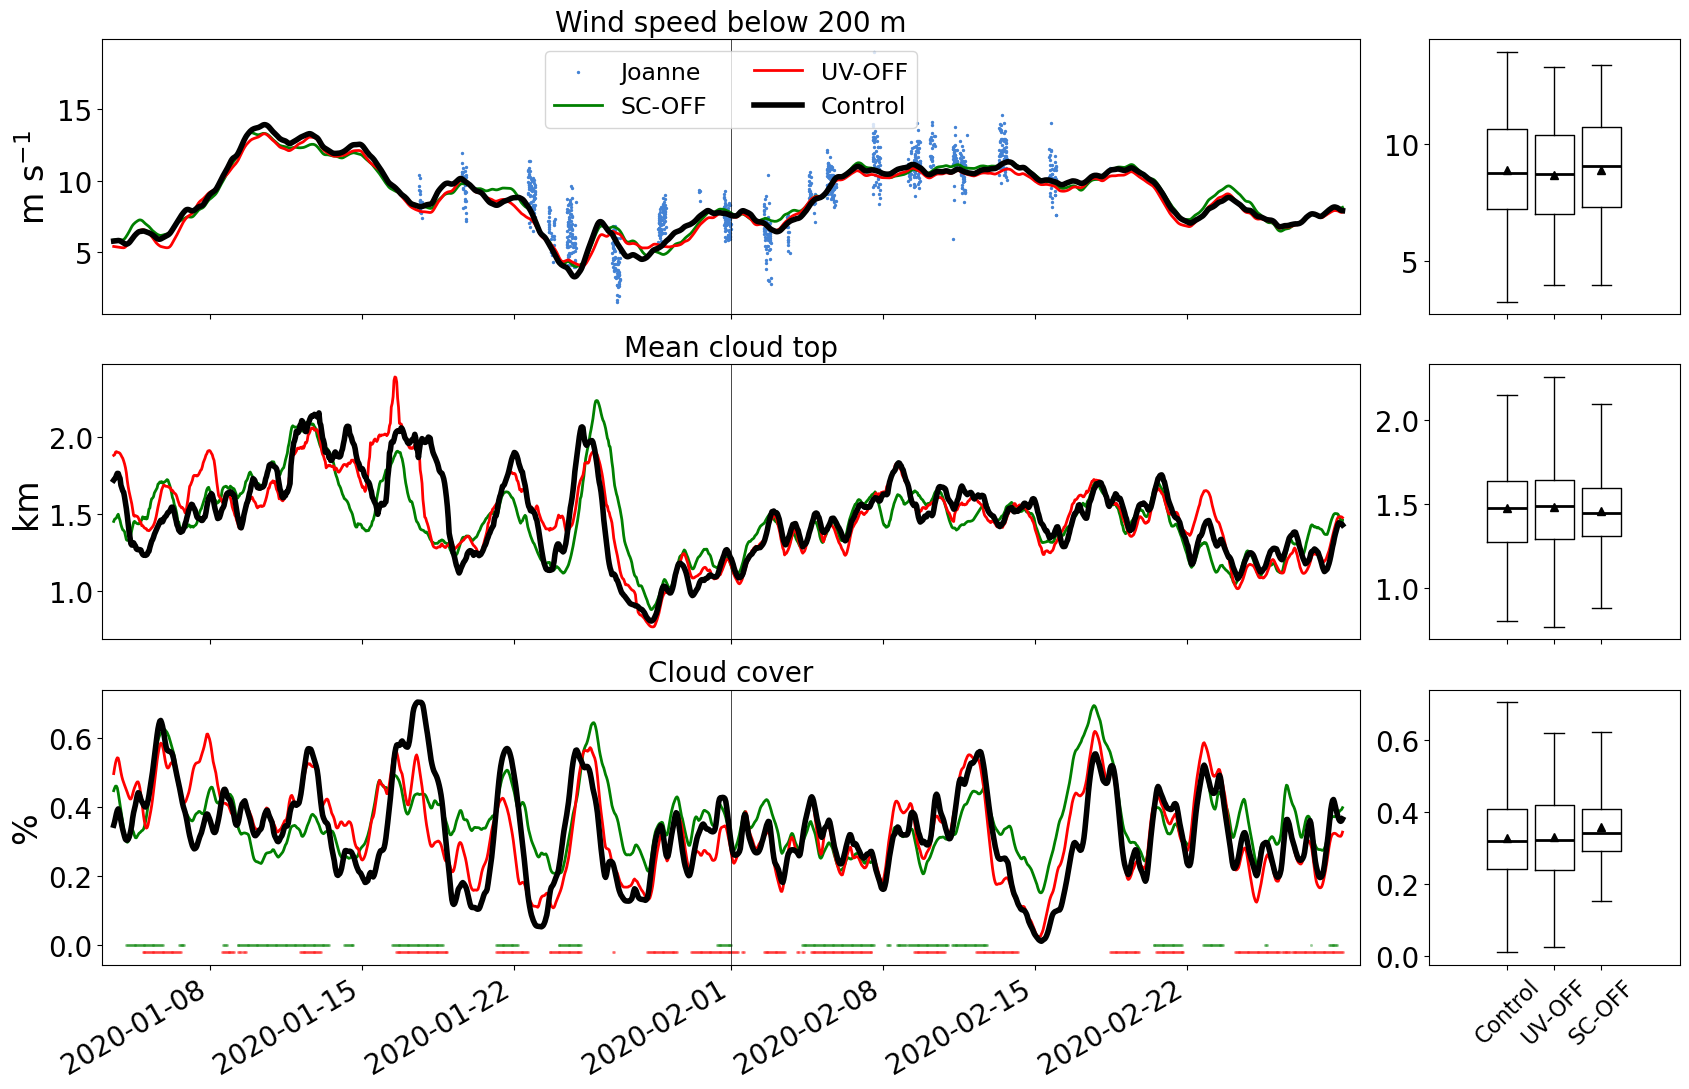

In [29]:
#%% Surface winds and clouds
bottom, top = 0.1, 0.9
left, right = 0.01, 0.9
fig, axs = plt.subplots(3,2,figsize=(17,11), gridspec_kw={'width_ratios': [5,1]})
fig.subplots_adjust(top=top, bottom=bottom, left=left, right=right, \
                    hspace=0.15, wspace=0.1)
iteration = 1.2
labels = []
layer=[0,200]
# Observations
axs[0,0].scatter(joanne.launch_time,joanne['wspd'].sel(alt=slice(layer[0],layer[1])).mean('alt'),\
                 c=col_obs[0],s=2,label='Joanne')

for ide, exp in reversed(list(enumerate(exps))):
    
    if exp == exps[0]:
        line =4
    else:
        line =2
    iteration -=0.3
    label = lab[ide]  # Get the label from the 'lab' array
    labels.append(label)  # Append the label to the list
    # HARMONIE
    harm2d_synopt[exp]['wspd'].\
        sel(z=slice(layer[0],layer[1])).mean('z')\
            .plot(x='time',ls='-',lw=line,c=col[ide],label=lab[ide],ax=axs[0,0])
    (harm_obj_synopt[exp]['mean_cl_top']/1000)\
            .plot(x='time',ls='-',lw=line,c=col[ide],ax=axs[1,0])
    harm2d_synopt[exp]['cc_4km']\
            .plot(x='time',ls='-',lw=line,c=col[ide],ax=axs[2,0])

    ## boxplots    
    filtered_data = {}
    filtered_data[0] = harm2d_synopt[exp]['wspd']\
            .where(~harm2d_synopt[exp]['wspd'].isnull().compute(),drop=True)\
            .sel(z=slice(layer[0],layer[1])).mean('z').values
    filtered_data[1] = (harm_obj_synopt[exp]['mean_cl_top']/1000)\
            .where(~harm_obj_synopt[exp]['mean_cl_top'].isnull().compute(),drop=True).values
    filtered_data[2] = harm2d_synopt[exp]['cc_4km']\
            .where(~harm2d_synopt[exp]['cc_4km'].isnull().compute(),drop=True).values

    for idx, data in enumerate(filtered_data):
        axs[idx,1].boxplot(filtered_data[idx],\
                    positions=[round(iteration,1)],\
            whis=1.8,showfliers=False,showmeans=True,meanline=False,widths=0.25,\
                medianprops=dict(color="k", lw=2),\
                meanprops={"markerfacecolor":"black",'markeredgecolor':'black'})  


    if exp==exps[1]:
        for ii in time_CC_exp_is_smaller[exp].values:
            axs[2,0].plot(ii,-0.02,marker='s', linestyle='None',\
                                               markersize=1.5,mfc='none', mec=col[ide],alpha=0.4)
    elif exp==exps[2]:
        for ii in time_CC_exp_is_smaller[exp].values:
            axs[2,0].plot(ii,0.01,marker='s', linestyle='None',\
                                               markersize=1.5,mfc='none', mec=col[ide],alpha=0.4)

axs[idx,1].set_xticklabels(labels, rotation=45 )
axs[idx,1].tick_params(axis='x', which='major', labelsize=16)
axs[idx,1].set_ylabel('')
for idx,var in enumerate(axs): 
    axs[idx,0].axvline(np.datetime64('2020-02-01T00'), color='k', linestyle='-', linewidth=0.5)
    axs[idx,0].set_xlim((srt_time,end_time))
    axs[idx,0].set_xlabel(r'')
    axs[idx,1].set_xlabel(r'')

axs[0,0].set_title(r'Wind speed below 200 m',fontsize =20)
axs[0,0].set_ylabel(r'm s$^{-1}$')
axs[1,0].set_title(r'Mean cloud top',fontsize =20)
axs[1,0].set_ylabel(r'km')
axs[2,0].set_title(r'Cloud cover',fontsize =20)
axs[2,0].set_ylabel(r'%')
axs[0,0].tick_params(labelbottom=False) 
axs[1,0].tick_params(labelbottom=False) 
axs[0,1].tick_params(labelbottom=False) 
axs[1,1].tick_params(labelbottom=False) 
axs[0,0].legend(fontsize=17,ncol=2)
plt.tight_layout()
# plt.savefig(figure_dir+'tmser_wspd.pdf')

